#utility NB for clustering lecture UI class 10
#FBB November 2015

In [28]:
__author__ = 'fbb'
%pylab inline
import numpy as np
import pylab as pl
#import kmseg
import sklearn.cluster
from sklearn import mixture
from PIL import Image
from scipy.misc import imread
from scipy.cluster.vq import kmeans2
import json
import os
s = json.load( open(os.getenv ('PUI2015')+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)

kelly_colors_hex = [
    '#FFB300', # Vivid Yellow
    '#803E75', # Strong Purple
    '#FF6800', # Vivid Orange
    '#A6BDD7', # Very Light Blue
    '#C10020', # Vivid Red
    '#CEA262', # Grayish Yellow
    '#817066', # Medium Gray
    '#007D34', # Vivid Green
    '#F6768E', # Strong Purplish Pink
    '#00538A', # Strong Blue
    '#FF7A5C', # Strong Yellowish Pink
    '#53377A', # Strong Violet
    '#FF8E00', # Vivid Orange Yellow
    '#B32851', # Strong Purplish Red
    '#F4C800', # Vivid Greenish Yellow
    '#7F180D', # Strong Reddish Brown
    '#93AA00', # Vivid Yellowish Green
    '#593315', # Deep Yellowish Brown
    '#F13A13', # Vivid Reddish Orange
    '#232C16', # Dark Olive Green
    '#FFB300', # Vivid Yellow
    '#803E75', # Strong Purple
    '#FF6800', # Vivid Orange
    '#A6BDD7', # Very Light Blue
    '#C10020', # Vivid Red
    '#CEA262', # Grayish Yellow
    '#817066', # Medium Gray
    '#007D34', # Vivid Green
    '#F6768E', # Strong Purplish Pink
    '#00538A', # Strong Blue
    '#FF7A5C', # Strong Yellowish Pink
    '#53377A', # Strong Violet
    '#FF8E00', # Vivid Orange Yellow
    '#B32851', # Strong Purplish Red
    '#F4C800', # Vivid Greenish Yellow
    '#7F180D', # Strong Reddish Brown
    '#93AA00', # Vivid Yellowish Green
    '#593315', # Deep Yellowish Brown
    '#F13A13', # Vivid Reddish Orange
    '#232C16', # Dark Olive Green
    '#FFB300', # Vivid Yellow
    '#803E75', # Strong Purple
    '#FF6800', # Vivid Orange
    '#A6BDD7', # Very Light Blue
    '#C10020', # Vivid Red
    '#CEA262', # Grayish Yellow
    '#817066', # Medium Gray
    '#007D34', # Vivid Green
    '#F6768E', # Strong Purplish Pink
    '#00538A', # Strong Blue
    '#FF7A5C', # Strong Yellowish Pink
    '#53377A', # Strong Violet
    '#FF8E00', # Vivid Orange Yellow
    '#B32851', # Strong Purplish Red
    '#F4C800', # Vivid Greenish Yellow
    '#7F180D', # Strong Reddish Brown
    '#93AA00', # Vivid Yellowish Green
    '#593315', # Deep Yellowish Brown
    '#F13A13', # Vivid Reddish Orange
    '#232C16', # Dark Olive Green
    '#FFB300', # Vivid Yellow
    '#803E75', # Strong Purple
    '#FF6800', # Vivid Orange
    '#A6BDD7', # Very Light Blue
    '#C10020', # Vivid Red
    '#CEA262', # Grayish Yellow
    '#817066', # Medium Gray
    '#007D34', # Vivid Green
    '#F6768E', # Strong Purplish Pink
    '#00538A', # Strong Blue
    '#FF7A5C', # Strong Yellowish Pink
    '#53377A', # Strong Violet
    '#FF8E00', # Vivid Orange Yellow
    '#B32851', # Strong Purplish Red
    '#F4C800', # Vivid Greenish Yellow
    '#7F180D', # Strong Reddish Brown
    '#93AA00', # Vivid Yellowish Green
    '#593315', # Deep Yellowish Brown
    '#F13A13', # Vivid Reddish Orange
    '#232C16', # Dark Olive Green
    '#FFB300', # Vivid Yellow
    '#803E75', # Strong Purple
    '#FF6800', # Vivid Orange
    '#A6BDD7', # Very Light Blue
    '#C10020', # Vivid Red
    '#CEA262', # Grayish Yellow
    '#817066', # Medium Gray
    '#007D34', # Vivid Green
    '#F6768E', # Strong Purplish Pink
    '#00538A', # Strong Blue
    '#FF7A5C', # Strong Yellowish Pink
    '#53377A', # Strong Violet
    '#FF8E00', # Vivid Orange Yellow
    '#B32851', # Strong Purplish Red
    '#F4C800', # Vivid Greenish Yellow
    '#7F180D', # Strong Reddish Brown
    '#93AA00', # Vivid Yellowish Green
    '#593315', # Deep Yellowish Brown
    '#F13A13', # Vivid Reddish Orange
    '#232C16', # Dark Olive Green
    '#FFB300', # Vivid Yellow
    '#803E75', # Strong Purple
    '#FF6800', # Vivid Orange
    '#A6BDD7', # Very Light Blue
    '#C10020', # Vivid Red
    '#CEA262', # Grayish Yellow
    '#817066', # Medium Gray
    '#007D34', # Vivid Green
    '#F6768E', # Strong Purplish Pink
    '#00538A', # Strong Blue
    '#FF7A5C', # Strong Yellowish Pink
    '#53377A', # Strong Violet
    '#FF8E00', # Vivid Orange Yellow
    '#B32851', # Strong Purplish Red
    '#F4C800', # Vivid Greenish Yellow
    '#7F180D', # Strong Reddish Brown
    '#93AA00', # Vivid Yellowish Green
    '#593315', # Deep Yellowish Brown
    '#F13A13', # Vivid Reddish Orange
    '#232C16', # Dark Olive Green
 ]

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# HOW DOES CLUSTERING ACTUALLY WORK? separating distribution

##preparing a dataset from 3 gaussian distribution

(2, 100)


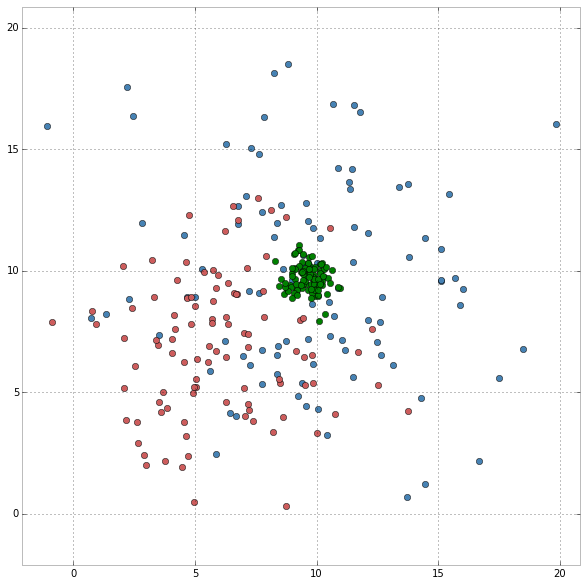

In [29]:
np.random.seed(1999)

pl.figure(figsize = (10,10))

k1s, k1m = np.random.rand()*5, random.rand()*10
k1 = (k1s*np.random.randn(100,2)+k1m).T
k2s, k2m = np.random.rand()*5, random.rand()*10
k2 = (k2s*np.random.randn(100,2)+k2m).T
k3s, k3m = np.random.rand()*5, random.rand()*10
k3 = (k3s*np.random.randn(100,2)+k3m).T
pl.plot(k1[0], k1[1], 'o')
pl.plot(k2[0], k2[1], 'o')
pl.plot(k3[0], k3[1], 'o')
kall = np.concatenate([k1.T, k2.T, k3.T])
lims = (min(min(kall[:,0]), min(kall[:,0]))-1, max(max(kall[:,0]), max(kall[:,1]))+1)
pl.xlim(lims)
pl.ylim(lims)
print k1.shape

#HARD CLUSTERING

##K-means clustering of random data

(-2.0990128339064675, 20.853825051590348)


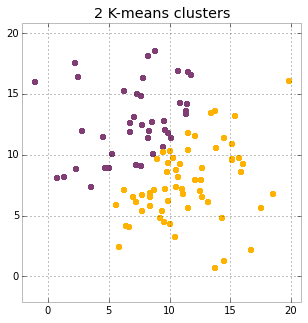

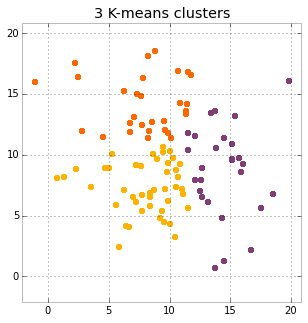

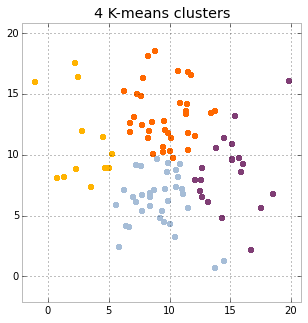

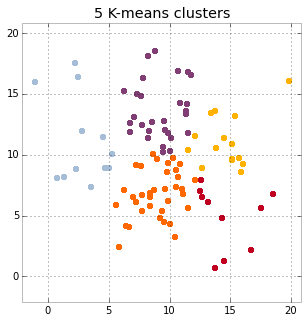

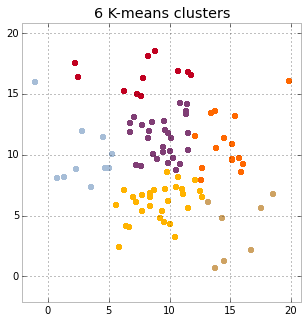

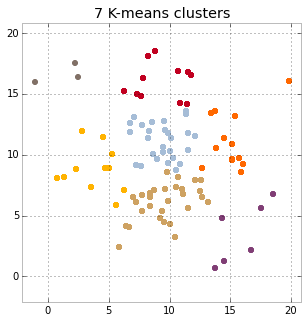

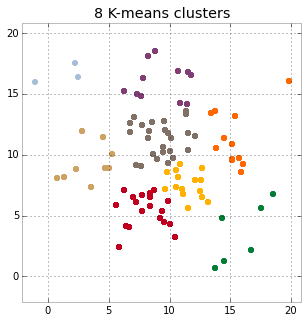

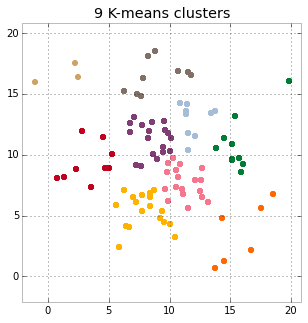

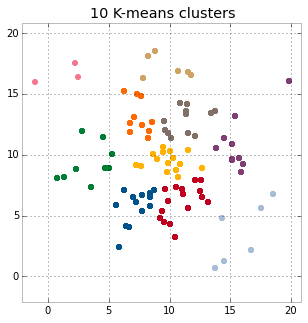

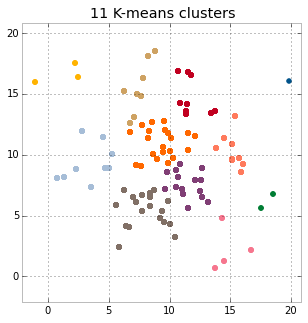

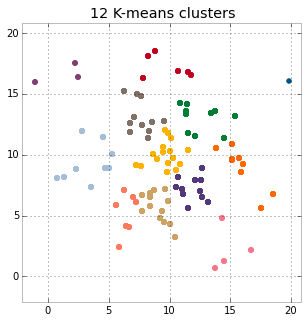

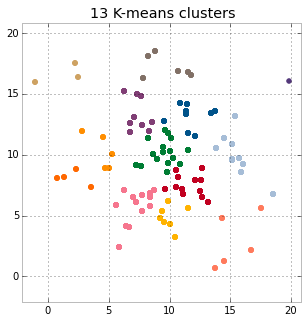

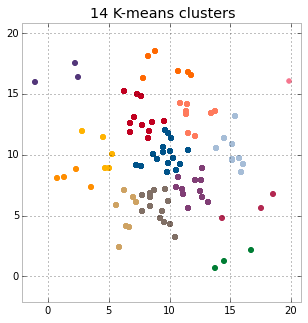

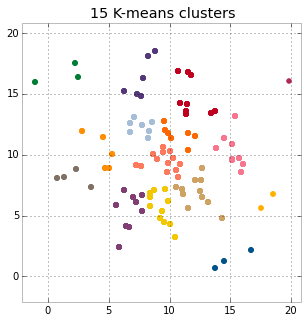

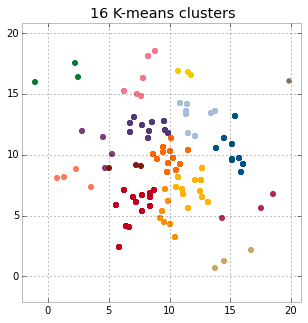

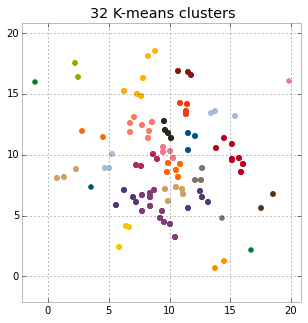

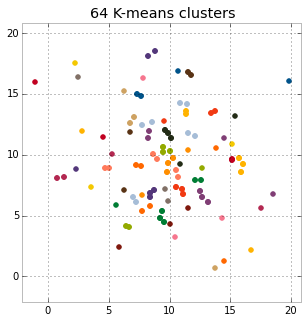

In [33]:
print lims
vs = []
for n_c in [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16, 32, 64]:
    clf = sklearn.cluster.KMeans(n_clusters=n_c)
    labels = clf.fit_predict(k1.T)#.reshape(100,2)
    pl.figure(figsize=(5,5))
    pl.subplot(111)
    
    for l in labels:
        if l in labels:
            pl.scatter(k1[0][labels==l], k1[1][labels==l], color=kelly_colors_hex[l])
    
    #pl.axis('equal')
    #pl.axis([lims[0], lims[1], lims[0], lims[1]])
    pl.xlim(lims)
    pl.ylim(lims)
    pl.title ("%d K-means clusters"%n_c)
    vs.append(np.sum([np.std(np.array([kall[:,0][labels==l], kall[:,1][labels==l]]).T - clf.cluster_centers_[l]) for l in labels]))
    

In [ ]:
kall = np.concatenate([k1.T, k2.T, k3.T])
vs = []
for n_c in [2,4,8,16]:
    clf = sklearn.cluster.KMeans(n_clusters=n_c)
    labels = clf.fit_predict(kall)#.reshape(100,2)

    fig = pl.figure(figsize = (22,10))
    for l in labels:
        ax1=fig.add_subplot(121)
        ax1.plot(k1[0], k1[1], 'o')
        ax1.plot(k2[0], k2[1], 'o')
        ax1.plot(k3[0], k3[1], 'o')
        ax2=fig.add_subplot(122)
        ax2.scatter(kall[:,0][labels==l], kall[:,1][labels==l], color=kelly_colors_hex[l])
    vs.append(np.sum([np.std(np.array([kall[:,0][labels==l], kall[:,1][labels==l]]).T - clf.cluster_centers_[l]) for l in labels]))
    

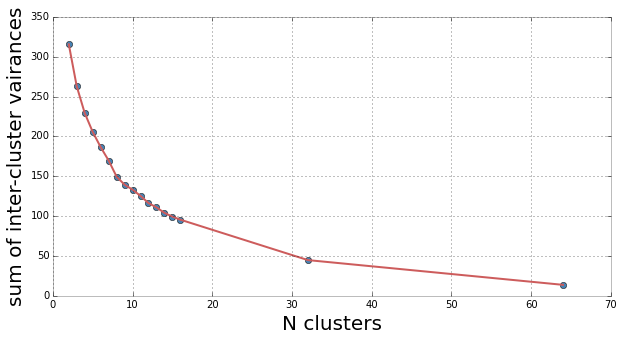

In [41]:
pl.figure(figsize=(10,5))
pl.ylabel("sum of inter-cluster vairances", fontsize=20)
pl.xlabel("N clusters", fontsize=20)
pl.plot([2,3,4,5,6,7,8,9,10,11,12,13,14,15,16, 32, 64], vs, 'o')
pl.plot([2,3,4,5,6,7,8,9,10,11,12,13,14,15,16, 32, 64], vs, '-')

#SOFT CLUSTERING

##K-means does not know about density. 
###if you knew you expect your data to follow a distributio (e.g. Gaussian) you could do better:
##Gaussian Mixtures and the Expectation Maximization algorithm.

In [9]:

g = mixture.GMM(n_components=3)
g.fit(kall)

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=3, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)

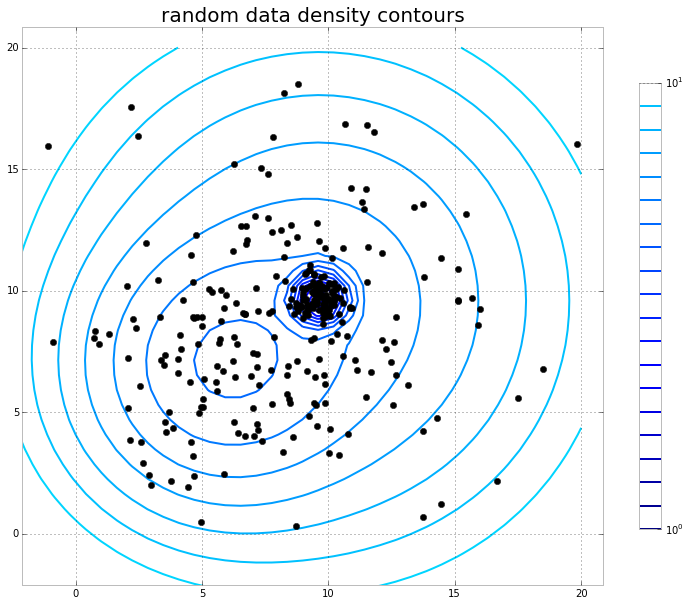

In [10]:
pl.figure(figsize=(13,10))
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
x = np.linspace(-10.0, 20.0)
y = np.linspace(-10.0, 20.0)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -g.score_samples(XX)[0]
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 1, 20))
CB = plt.colorbar(CS, shrink=0.8, extend='both', ticks=[1,10])
pl.plot(kall[:,0], kall[:,1], 'o', c='k' )

pl.xlim(lims)
pl.ylim(lims)
pl.title("random data density contours", fontsize=20)

[ 5.88135521  6.86630359] [ 6.75121203  6.86328889]
[ 9.63767142  9.7013445 ] [ 0.27291208  0.27799203]
[ 9.65274028  9.5735736 ] [ 15.25326603  16.40162939]
9.84626758541 9.84626758541 4.12260086849 4.12260086849
6.47237124206 6.47237124206 2.67420570137 0.559759076796
9.65879230261 9.65879230261 0.559759076796 0.559759076796


/Users/fbianco/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/IPython/kernel/__main__.py:21: RuntimeWarning: divide by zero encountered in double_scalars


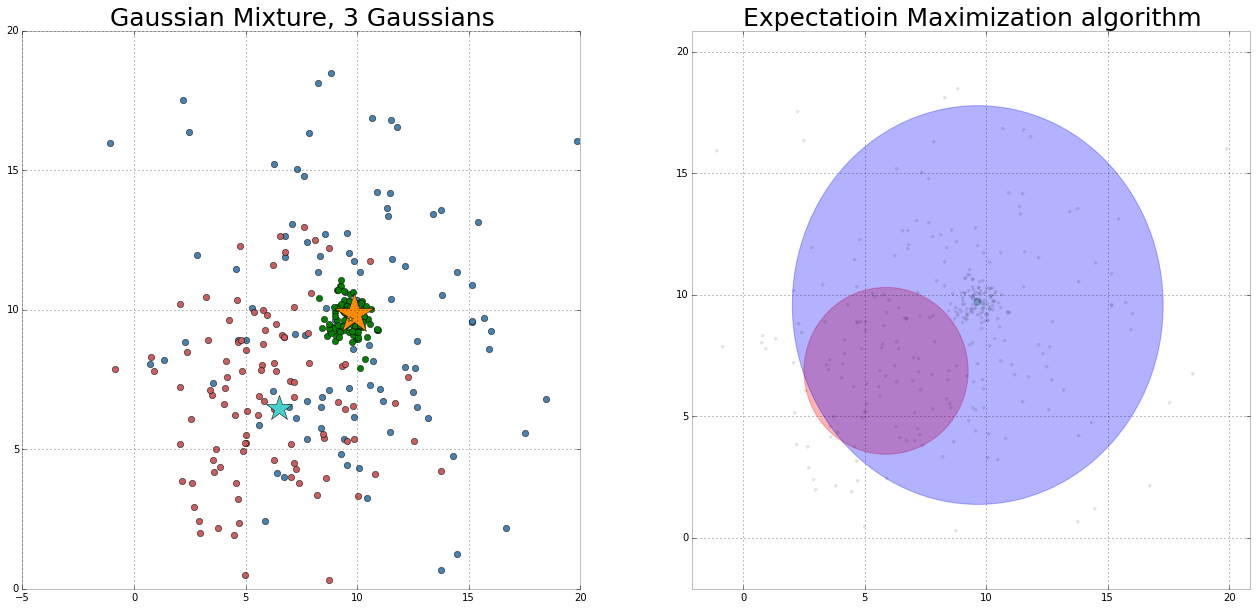

In [11]:
from scipy import linalg
import itertools
color_iter = itertools.cycle(['r', 'g', 'b', 'c', 'm'])
fig = pl.figure(figsize = (22,10))

for i, (clf, title) in enumerate([(g, 'GMM')]):
    ax2 = fig.add_subplot(122)
    Y_ = clf.predict(kall)
    for i, (mean, covar, color) in enumerate(zip(
            clf.means_, clf._get_covars(), color_iter)):
        v, w = linalg.eigh(covar)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        ax2.plot(kall[Y_ == i, 0], kall[Y_ == i, 1],'.', color='k', alpha=0.1)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180 + angle, color=color)
        ell.set_clip_box(ax2.bbox)
        ell.set_alpha(0.3)
        ax2.add_artist(ell)
        ax2.set_xlim(lims)
        ax2.set_ylim(lims)
        ax2.set_title("Expectatioin Maximization algorithm", fontsize=25)

        print mean, v
print k1m, k1m, k1s, k1s 
print k2m, k2m, k2s, k3s 
print k3m, k3m, k3s, k3s 
ax1 = fig.add_subplot(121)
ax1.plot(k1[0], k1[1], 'o')
ax1.plot(k2[0], k2[1], 'o')
ax1.plot(k3[0], k3[1], 'o')
ax1.plot(k1m, k1m, '*', lw=3, ms=k1s*10)
ax1.plot(k2m, k2m, '*', lw=3, ms=k2s*10)
ax1.plot(k3m, k3m, '*', lw=3, ms=k3s*10) 
ax1.set_title("Gaussian Mixture, 3 Gaussians", fontsize=25)
